In [1]:
###################################################################
#
#  :: Earth Temperature Model ::
#
# #################################################################

The task is to demonstrate how one can use coding and modelling to predict the earth surface temperature (and the atmosphere temperature)

In [3]:
# import modules 
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline

For this assignment, you will run an earth temperature model with a single-slab gray atmosphere. The equations for this model are described below <br>

Earth Energy = Energy In - Energy Out <br>
Earth Energy = $[\pi R_e^2 * [S_0(1-A)] + 4\pi R_e^2\epsilon\sigma T_a^4 - 4\pi R_e^2\sigma T_e^4]*dt$ <br>
Earth Energy = $[S_0(1-A) + 4\epsilon\sigma T_a^4 - 4\sigma T_e^4]*dt$ <br>

Again, we want the earth temperature, so we divide by heat capacity <br>
Earth Temperature = $[S_0(1-A) + 4\epsilon\sigma T_a^4 - 4\sigma T_e^4]*dt/C$ <br>

The atmopshere also changes temperature as it receives radiation from earth (we assume the atmosphere is entirely transparent to the short wave radiation from the sun). <br>

Atmosphere Energy = Energy In - Energy Out <br>
Atmosphere Temperature = (Energy In - Energy Out)*$dt/C_a$ <br>
Atmosphere Temperature = $[4\pi R_e^2\sigma T_e^4 - 2*(4\pi R_e^2)\sigma T_a^4]*dt/C$ <br> 
Atmosphere Temperature = $[\sigma T_e^4 - 2\sigma T_a^4]*dt/C$ <br>

NOTE: we can use $R_e$ for the atmosphere emission because the atmosphere is so thin compared to the radius of the earth

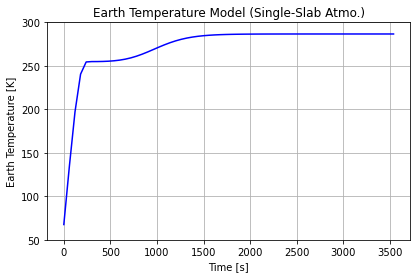

Earth temperature 286.639 K
Atmosphere temperature 241.034 K


In [14]:
# 'single slab' atmosphere model, aka gray atmosphere
# define variables
dt = 60 # s
time = np.arange(0,3600,dt) # list of times, measured in seconds
insolation = 1367 # Wm^-2
earth_temperature = 0 # K 
earth_temperature_values = [] # empty list so we can add earth temperature values
heat_capacity = 850
albedo = 0.3

atmosphere_temperature = 0 # K
atmosphere_heat_capacity = 700
emissivity = 0.75

def black_body(temp):
    sigma = 5.67E-8 # stefan boltzmann constant
    return sigma*np.power(temp,4)

# calculate the earth temperature (and atmosphere temperature) values for entire list of times 
for interval in time:
    earth_temperature += \
    (insolation*(1-albedo) + 4*emissivity*(black_body(atmosphere_temperature)) - \
     4*black_body(earth_temperature))*dt/heat_capacity
    atmosphere_temperature += \
    emissivity*(black_body(earth_temperature)-2*black_body(atmosphere_temperature))*dt/atmosphere_heat_capacity
    earth_temperature_values.append(earth_temperature)

# plot the data
plt.figure(figsize=(6.5,4))
plt.title('Earth Temperature Model (Single-Slab Atmo.)')
plt.plot(time, earth_temperature_values, color='blue')
plt.ylim((50,300))
plt.xlabel('Time [s]'), plt.ylabel('Earth Temperature [K]')
plt.grid(True)
plt.show()

max_temp = max(earth_temperature_values)
max_temp_atmo = atmosphere_temperature
print('Earth temperature', f'{max_temp:.3f}','K')
print('Atmosphere temperature', f'{max_temp_atmo:.3f}','K')